In [1]:
!nvidia-smi

Sun Aug 28 17:40:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#required libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip '/content/drive/MyDrive/CSE498/dataset.zip'

Archive:  /content/drive/MyDrive/CSE498/dataset.zip
   creating: test/flood/
  inflating: test/flood/0MHG92um5wo_25.jpg  
  inflating: test/flood/1_1364.jpg   
  inflating: test/flood/1_17550.jpg  
  inflating: test/flood/1_8530.jpg   
  inflating: test/flood/10_0.jpg     
  inflating: test/flood/10_106.jpg   
  inflating: test/flood/11_522.jpg   
  inflating: test/flood/12_382.jpg   
  inflating: test/flood/12_4514.jpg  
  inflating: test/flood/12_4600.jpg  
  inflating: test/flood/12_4770.jpg  
  inflating: test/flood/12_4814.jpg  
  inflating: test/flood/12_4820.jpg  
  inflating: test/flood/12_4864.jpg  
  inflating: test/flood/12_5114.jpg  
  inflating: test/flood/12_8026.jpg  
  inflating: test/flood/12_8728.jpg  
  inflating: test/flood/12_8896.jpg  
  inflating: test/flood/12_9078.jpg  
  inflating: test/flood/14_0.jpg     
  inflating: test/flood/14_2696.jpg  
  inflating: test/flood/2qtRG8KDlWg_2.jpg  
  inflating: test/flood/3_1322.jpg   
  inflating: test/flood/4_286.jpg   

In [5]:
train_path = 'train'
val_path = 'val'
test_path = 'test'

In [6]:
class_labels = sorted(os.listdir(train_path))
class_labels

['flood', 'not_flood']

In [22]:
directories = os.listdir(train_path)
sample_image_flood = []
sample_image_not_flood = []
class_images = []

for d in directories:
    image_paths = train_path + '/' + d + '/*.jpg'
    image_files = glob.glob(image_paths)
    for i in range(5):
        if d == 'flood':
            sample_image_flood.append(plt.imread(image_files[random.randint(0, len(image_files) - 1)]))
        else:
            sample_image_not_flood.append(plt.imread(image_files[random.randint(0, len(image_files) - 1)]))
    class_images.append(image_files)

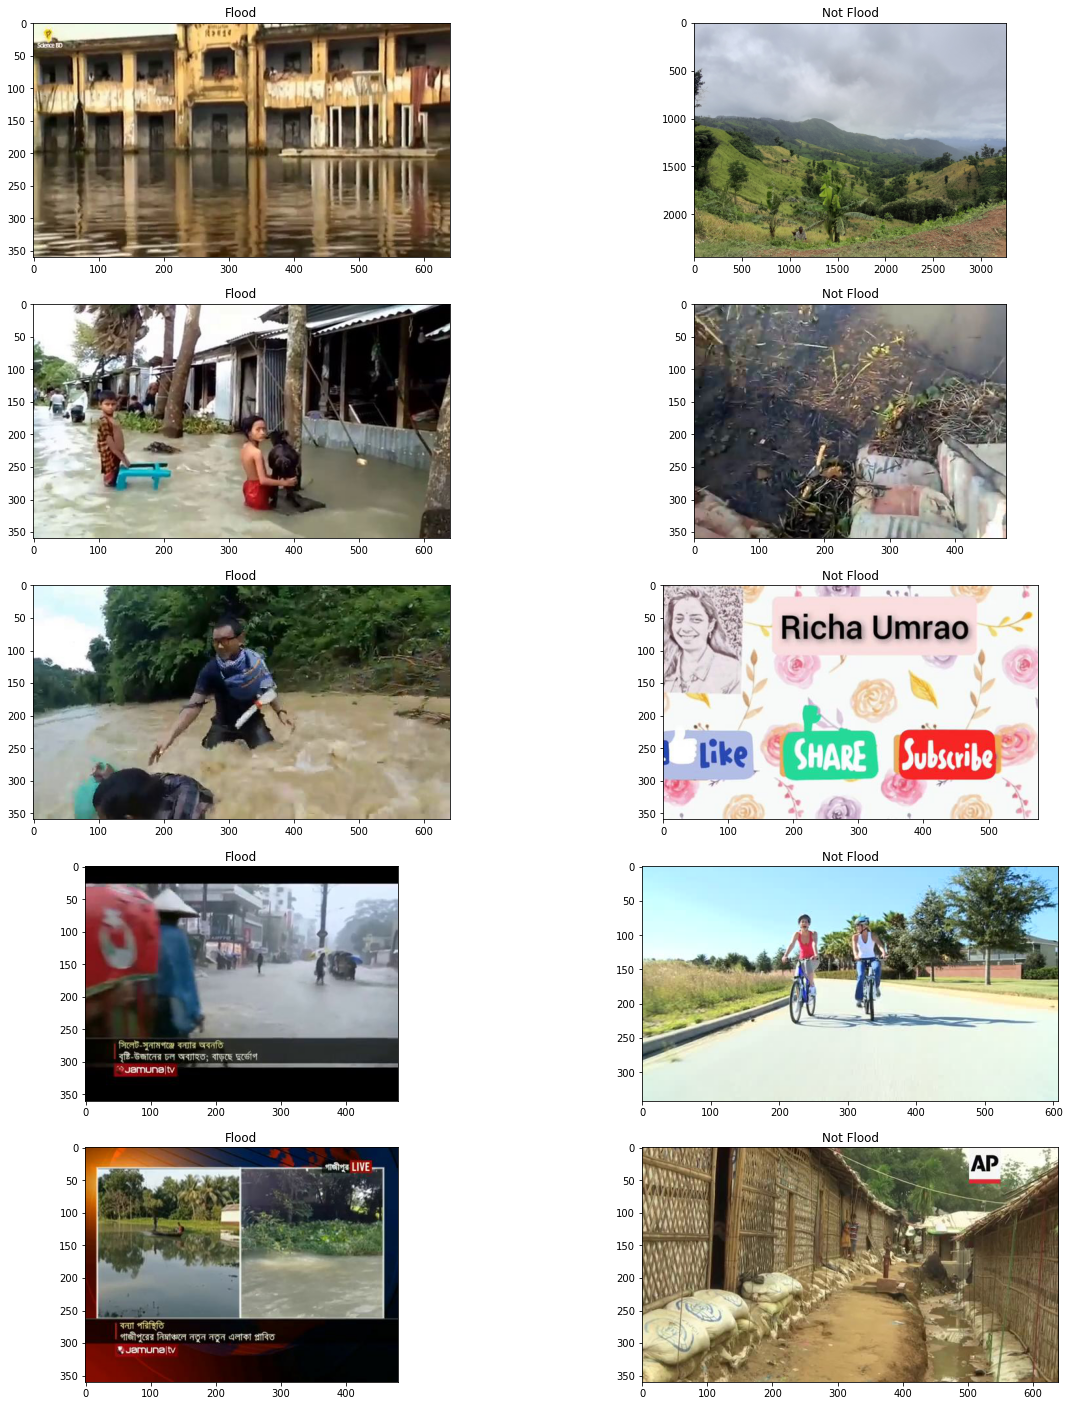

In [23]:
# sample_images = sample_image_flood + sample_image_not_flood
# print(len(sample_images))
plt.figure(figsize=(20,25))

count = 0
offset = 1

while count < len(sample_image_flood):
    plt.subplot(5,2,count+offset)
    # image = batch[0]
    plt.imshow(np.squeeze(sample_image_flood[count])) 
    plt.title('Flood')
    plt.subplot(5,2,count+offset+1)
    # image = batch[0]
    plt.imshow(np.squeeze(sample_image_not_flood[count])) 
    plt.title('Not Flood')
    
    count += 1
    offset += 1     

In [24]:
train_image_count = []

for i in class_images:
    train_image_count.append(len(i))

train_image_count

[1448, 477]

In [25]:
directories = os.listdir(test_path)
test_image_count = []

for d in directories:
    image_paths = test_path + '/' + d + r'/*.jpg'
    image_files = glob.glob(image_paths)
    test_image_count.append(len(image_files))

test_image_count

[181, 63]

In [27]:
directories = os.listdir(val_path)
val_image_count = []

for d in directories:
    image_paths = val_path + '/' + d + r'/*.jpg'
    image_files = glob.glob(image_paths)
    val_image_count.append(len(image_files))

val_image_count

[181, 56]

In [28]:
dataset_info = pd.DataFrame({'Vehicle': class_labels, 'Train_Count': train_image_count, 'Test_Count': test_image_count, 'Val_Count': val_image_count})
dataset_info

Vehicle  Train_Count  Test_Count  Val_Count
0      flood         1448         181        181
1  not_flood          477          63         56

In [29]:
df = pd.melt(dataset_info, id_vars='Vehicle', var_name='Split', value_name="Count")
df

Vehicle        Split  Count
0      flood  Train_Count   1448
1  not_flood  Train_Count    477
2      flood   Test_Count    181
3  not_flood   Test_Count     63
4      flood    Val_Count    181
5  not_flood    Val_Count     56

<Figure size 1440x576 with 0 Axes>

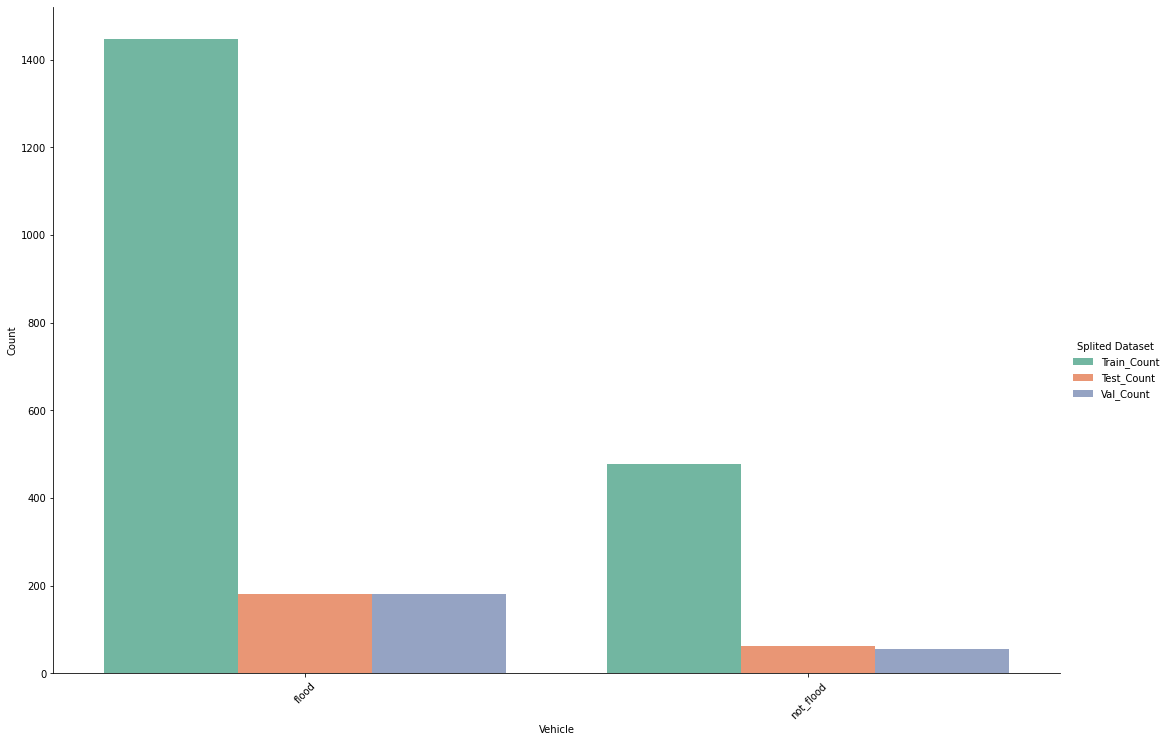

In [30]:
plt.figure(figsize=(20, 8))

g = sns.catplot(
    data=df, kind='bar',
    x='Vehicle', y='Count', hue='Split', palette='Set2', height=10, aspect=1.5)

plt.xticks(rotation=45)
g.set_axis_labels('Vehicle', 'Count')
g.legend.set_title('Splited Dataset')

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input

In [32]:
BATCH_SIZE = 32
IMG_SIZE = (244, 244)

In [33]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_path,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(val_path,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_path,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1963 files belonging to 2 classes.
Found 245 files belonging to 2 classes.
Found 247 files belonging to 2 classes.


In [34]:
class_names = train_dataset.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [35]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

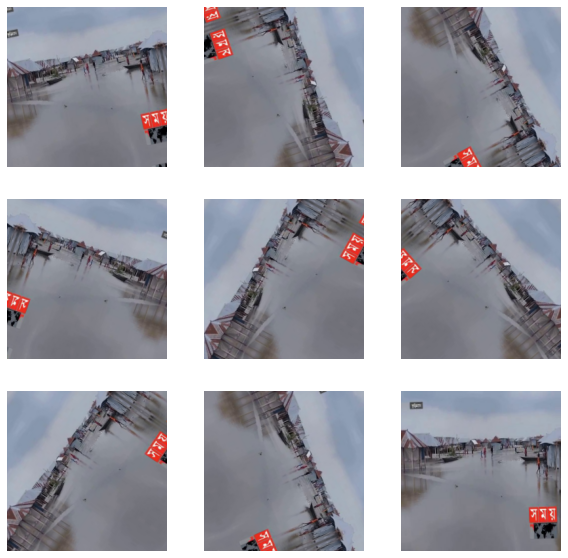

In [36]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [74]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [75]:
base_model.trainable = False

In [76]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [77]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)


In [78]:
inputs = tf.keras.Input(shape=(244, 244, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [79]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 244, 244, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 244, 244, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0   

In [81]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validation_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

8/8 [==============================] - 3s 185ms/step - loss: 2.0484 - accuracy: 0.4449
initial loss: 2.05
initial accuracy: 0.44


In [82]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
62/62 [==============================] - 17s 249ms/step - loss: 1.7351 - accuracy: 0.6042 - val_loss: 1.7990 - val_accuracy: 0.4898
Epoch 2/20
62/62 [==============================] - 16s 254ms/step - loss: 1.5858 - accuracy: 0.6230 - val_loss: 1.6485 - val_accuracy: 0.5184
Epoch 3/20
62/62 [==============================] - 17s 266ms/step - loss: 1.4818 - accuracy: 0.6510 - val_loss: 1.5332 - val_accuracy: 0.5469
Epoch 4/20
62/62 [==============================] - 16s 250ms/step - loss: 1.3750 - accuracy: 0.6475 - val_loss: 1.4201 - val_accuracy: 0.5796
Epoch 5/20
62/62 [==============================] - 16s 250ms/step - loss: 1.2612 - accuracy: 0.6760 - val_loss: 1.3311 - val_accuracy: 0.6000
Epoch 6/20
62/62 [==============================] - 16s 252ms/step - loss: 1.2264 - accuracy: 0.6791 - val_loss: 1.2555 - val_accuracy: 0.6163
Epoch 7/20
62/62 [==============================] - 16s 252ms/step - loss: 1.2286 - accuracy: 0.6714 - val_loss: 1.1549 - val_accuracy: 0.6408

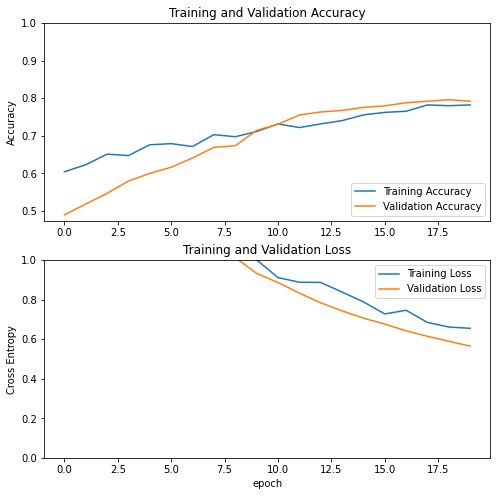

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

fine-tuning

In [84]:
base_model.trainable = True

In [85]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
# fine_tune_at = 5

# Freeze all the layers before the `fine_tune_at` layer
# for layer in base_model.layers[:fine_tune_at]:
#   layer.trainable = False
for layer in base_model.layers:
  layer.trainable = True

Number of layers in the base model:  19


In [86]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/100),
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 244, 244, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 244, 244, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0   

In [87]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 20/40
62/62 [==============================] - 39s 587ms/step - loss: 0.5597 - accuracy: 0.8105 - val_loss: 0.4735 - val_accuracy: 0.7959
Epoch 21/40
62/62 [==============================] - 37s 579ms/step - loss: 0.4834 - accuracy: 0.8151 - val_loss: 0.4196 - val_accuracy: 0.8082
Epoch 22/40
62/62 [==============================] - 37s 581ms/step - loss: 0.4249 - accuracy: 0.8237 - val_loss: 0.3757 - val_accuracy: 0.8245
Epoch 23/40
62/62 [==============================] - 37s 580ms/step - loss: 0.3704 - accuracy: 0.8436 - val_loss: 0.3458 - val_accuracy: 0.8408
Epoch 24/40
62/62 [==============================] - 37s 579ms/step - loss: 0.3239 - accuracy: 0.8721 - val_loss: 0.3111 - val_accuracy: 0.8531
Epoch 25/40
62/62 [==============================] - 37s 581ms/step - loss: 0.3198 - accuracy: 0.8655 - val_loss: 0.2877 - val_accuracy: 0.8653
Epoch 26/40
62/62 [==============================] - 36s 577ms/step - loss: 0.2922 - accuracy: 0.8742 - val_loss: 0.2618 - val_accuracy:

In [88]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

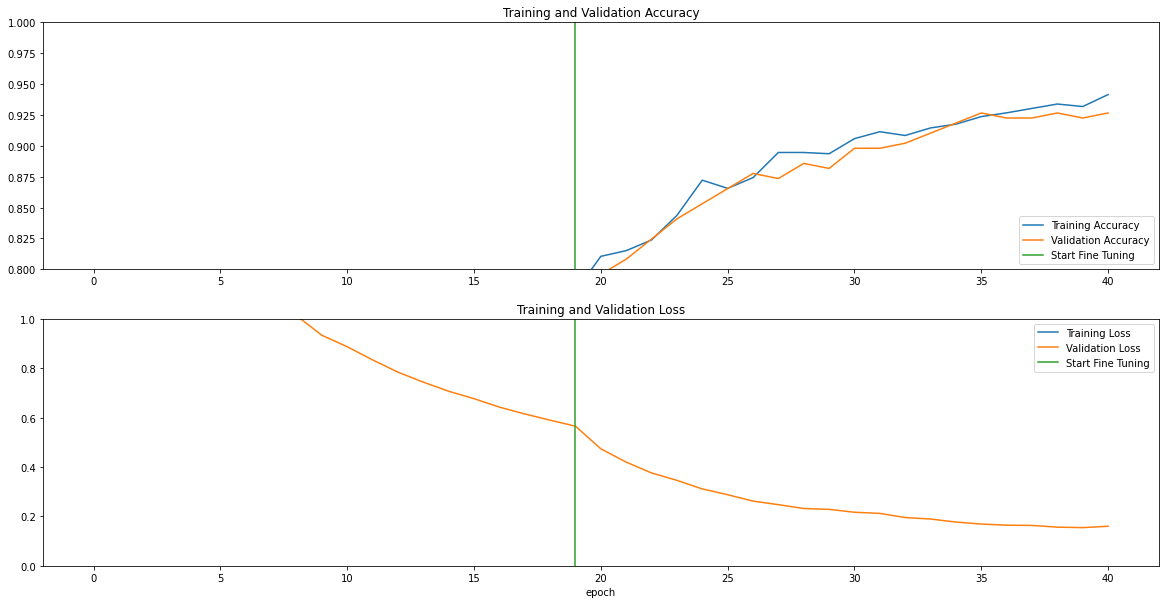

In [107]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [90]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

8/8 [==============================] - 2s 184ms/step - loss: 0.1779 - accuracy: 0.9150
Test accuracy : 0.9149797558784485


Predictions:
 [1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Labels:
 [1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


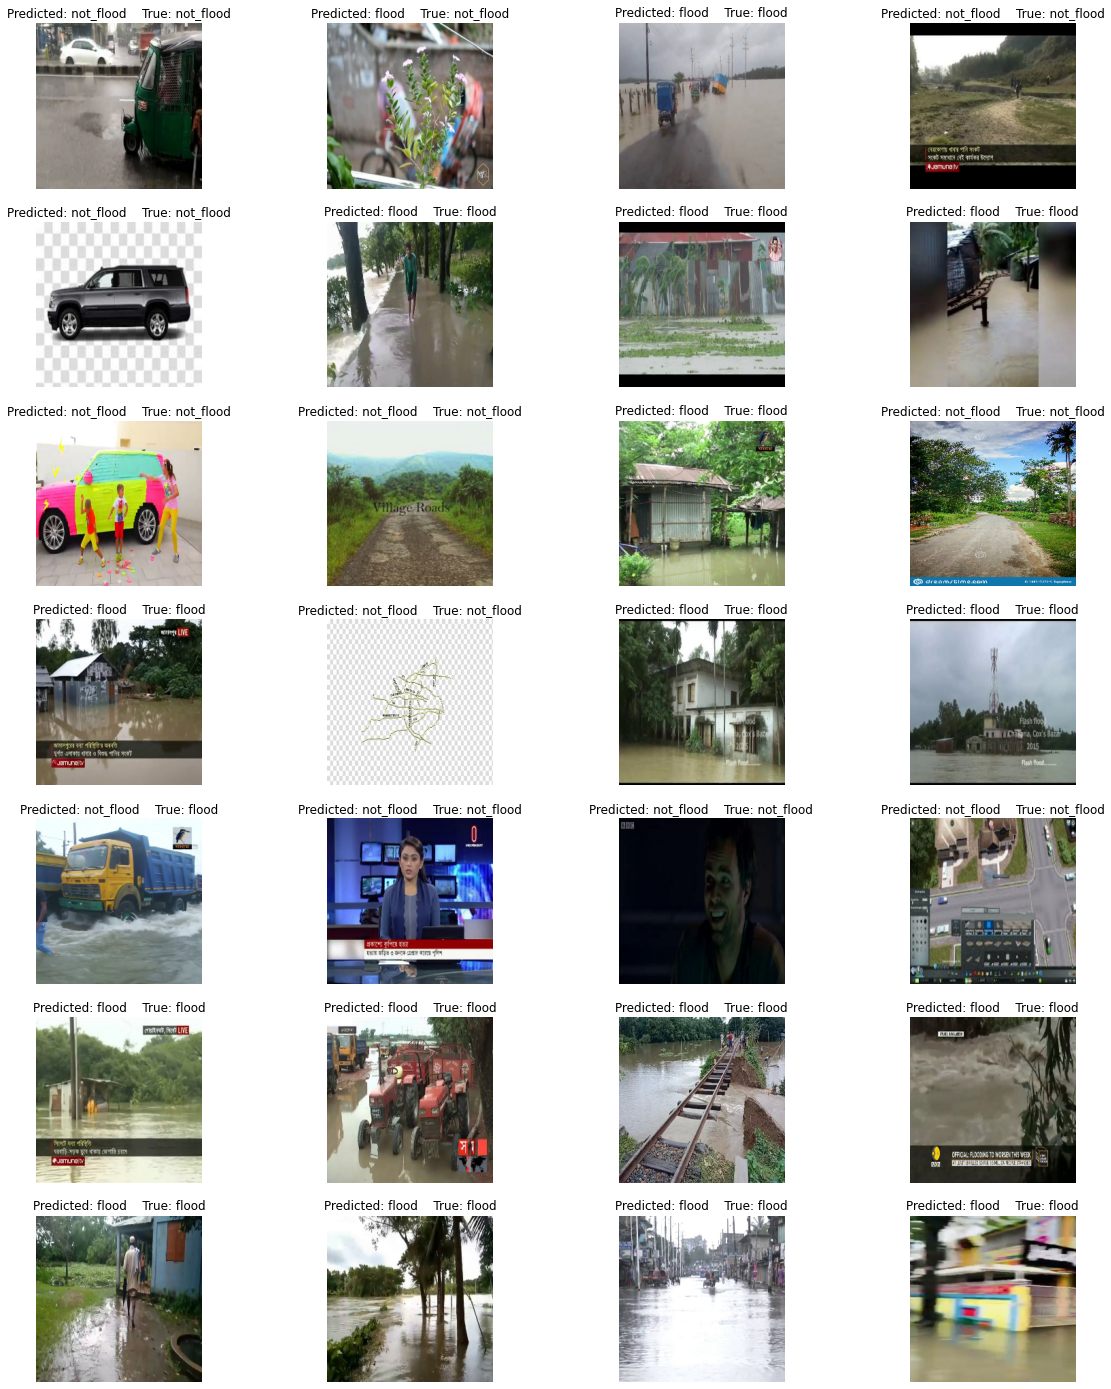

In [113]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 25))
for i in range(28):
  ax = plt.subplot(7, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title('Predicted: '+ class_names[predictions[i]] + '    True: ' + class_names[label_batch[i]])
  plt.axis("off")

In [106]:
model.save('vgg16.h5')

In [124]:
# test_label = np.concatenate([y for x, y in test_dataset], axis=0) 

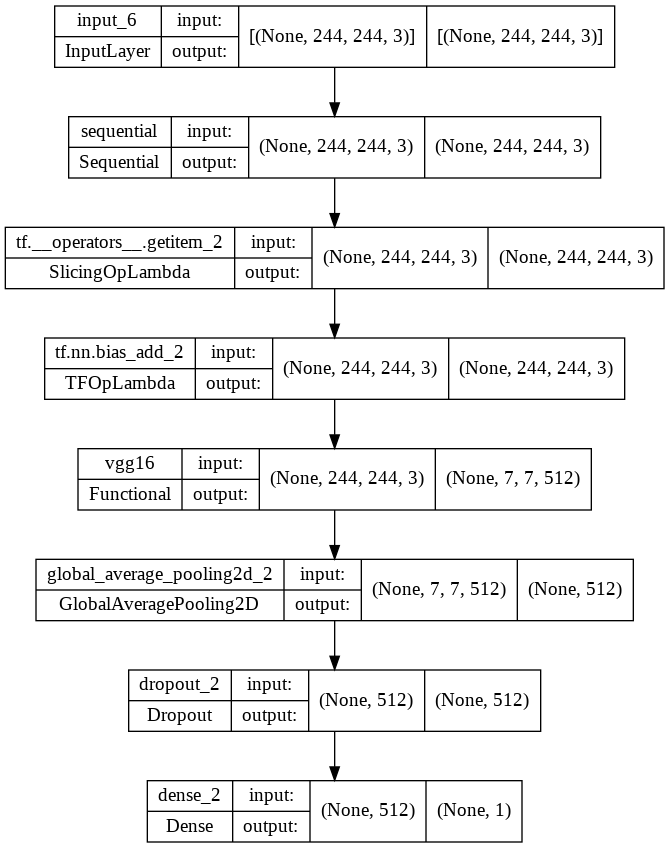

In [128]:
from tensorflow import keras

keras.utils.plot_model(model, "model.png", show_shapes=True)

In [136]:
predict = np.array([])
l =  np.array([])
for x, y in test_dataset:
  p = model.predict(x).flatten()
  p = tf.nn.sigmoid(p)
  p = tf.where(p < 0.5, 0, 1)
  predict = np.concatenate([predict, p])
  l = np.concatenate([l, y])

In [137]:
from sklearn.metrics import classification_report

print(classification_report(l, predict, target_names=class_names))

              precision    recall  f1-score   support

       flood       0.94      0.96      0.95       181
   not_flood       0.89      0.82      0.85        66

    accuracy                           0.92       247
   macro avg       0.91      0.89      0.90       247
weighted avg       0.92      0.92      0.92       247



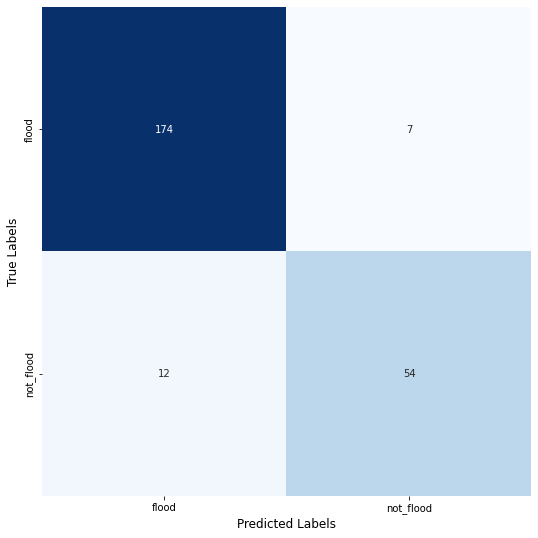

In [138]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(l, predict)

plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True, square=True, xticklabels=class_names, yticklabels=class_names, fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()